# Bound long waves

<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

In [5]:
run Initialize/init_4a.ipynb

Packages successfully loaded


Welcome at the first part of week 4, were we use the expression of the wave envelope to compute the fluctuating part of the wave energy, radiation stress, and the bound long wave.

## 1) Wave Envelope

We discussed the wave envelope in week 2 for two harmonic components with equal amplitude. We will continue here on the functions you made in week 2, for this wave envelope (envelope_t and envelope_x). Can you paste these in the envelope_eta_t and envelope_eta_x below? The envelope_eta_t(t) will describe the time series of the wave envelope, while the envelope_eta_x(x) will be used to calculate the surface elevation along a spatial axis. The function Show_W4_Q1 will check your functions' returned values and plot them on top of the components' surface elevation ($\eta$).

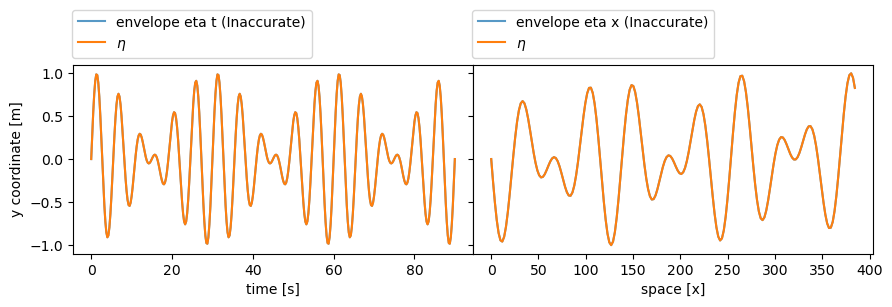

In [12]:
a1 = 0.5
a2 = 0.5
T1, T2 = 5, 6
tp = 0  # the time point of interest for a spatial analysis
xp = 0  # the spatial location of interest for a time analysis
h = 50

def wavelength(T, d):
    L = 9.81 * T**2 / (2 * np.pi)
    for i in range(1000):
        L = 9.81 * T**2 / ( 2 * np.pi) * np.tanh(2 * np.pi * d / L)
    return L

L1 = wavelength(T1, h)
L2 = wavelength(T2, h)

# These can be used to build your function.
t = np.arange(0, 80, 5)
x = np.arange(0, 350, 20)


def envelope_eta_t(a1, a2, T1, T2, t, xp):
    eta = a1 * np.sin(2 * np.pi / T1 * t - 2 * np.pi / L1 * xp) + a2 * np.sin(2 * np.pi / T2 * t - 2 * np.pi / L2 * xp)
    return eta


def envelope_eta_x(a1, a2, T1, T2, tp, x):
    eta = a1 * np.sin(2 * np.pi / T1 * tp - 2 * np.pi / L1 * x) + a2 * np.sin(2 * np.pi / T2 * tp - 2 * np.pi / L2 * x)
    return eta


Show_W4_Q1()

## 2) Fluctuating wave energy (E)

Can you use the expression of the wave envelope to compute the fluctuating part of the wave energy?

Almost there, your function envelope_E_x can not be plotted, please try to fix the bug.


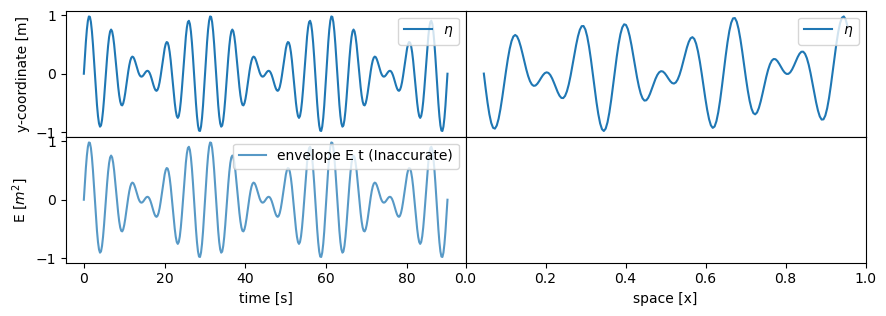

In [9]:
rho = 1025  # kg/m3


def envelope_E_t(a1, a2, T1, T2, t, xp, rho):
    eta = envelope_eta_t(a1, a2, T1, T2, t, xp)
    return eta


def envelope_E_x(a1, a2, T1, T2, t, xp, rho):
    eta = envelope_eta_x(a1, a2, T1, T2, tp, x)
    return eta


Show_W4_Q2()

## 3) Fluctuating radiant stress (Sxx)

Can you calculate the radiant stress (Sxx) that includes that effect of bound long waves? You may for this bound long wave assume that: 


\begin{equation}
\tag{1}
n = \frac{c_g}{c_{average}}
\end{equation}


\begin{equation}
\tag{2}
c_{average} =\frac{c_1 + c_2}{2}
\end{equation}

In [ ]:
c1 = L1 / T1
c2 = L2 / T2
    c_avg = (c1 + c2) / 2
    n = cg / c

def envelope_Sxx_t(a1, a2, T1, T2, t, xp, rho):
    E = envelope_E_t(a1, a2, T1, T2, t, xp, rho)


    


    Sxx = (2 * n - 0.5) * E

    return Sxx


envelope_Sxx_t(a1, a2, T1, T2, t, xp, rho)


def envelope_Sxx_x(a1, a2, T1, T2, tp, x, rho):
    E = envelope_E_x(a1, a2, T1, T2, tp, x, rho)

    ...

    Sxx = (2 * n - 0.5) * E

    return Sxx


Show_W4_Q3()

## 4) Bound long wave

The bound long wave surface elevation amplitude for this situation was derived by Longuet-Higgens and Stewart (1962). This is expression 3 below, and Eq. 3.134 in Coastal Morphodynamic modelling guide.

\begin{equation}
\tag{3}
\eta_b = \frac{\Delta k^2 ga^2 (2n-0.5)}{\Delta \omega^2-gh\Delta k^2} = \frac{-ga^2(2n-0.5)}{gh-\frac{\Delta \omega^2}{\Delta k^2}} = \frac{-ga^2(2n-0.5)}{gh-c_g^2}
\end{equation}

Due to the wave height variations in the group, the wave energy and radiation stresses vary in the group. This also that the set-down in the shoaling zone varies within the group, with the larger set-down under the higher waves in the group. This results in a mean water level fluctuation on the scale of the wave group with the largest depression under the highest waves in the group. This leads to a long wave motion, the so-called bound long wave, which is forced by the group and travels at the speed of this group. For a perfect bound long wave, the phase-shift between the long wave and the short-wave envelope is $\pi$ ; the wave trough of the bound long waves coincides with the maximum of the wave envelope. This negative correlation changes to a positive correlation as the waves enter the surf zone. This can be understood from intermittent wave-breaking in the group, generating a time-varying set-up. See also section 5.8.2 in the textbook.

Can you compute the bound long wave surface elevation amplitude? You can check your answer by running the cell and then pressing the button "Check loaded values". We recommend you write a function for this, which can be used in the follow-up question. 

In [ ]:
eta_b = None

Check_W4_Q4()

Can you calculate the temporal and spatial signals of the bound long wave? Show_W4_Q4() will plot the outcome on top of the surface elevation ($\eta$) and the envelope.

In [ ]:
def boundwave_eta_t(a1, a2, T1, T2, t, xp, rho):
    eta = ...
    return eta


def boundwave_eta_x(a1, a2, T1, T2, tp, x, rho):
    eta = ...
    return eta


Show_W4_Q4()

You can see in the figure that the trough of the bound long wave coincides with the highest waves in the group. What would that mean for the direction of the orbital velocities of the bound long wave under the highest waves in the group? We are going to use this in chapter 7 to explain the role of long waves in cross-shore sediment transport.